/tmp/ipython-input-587657302.py:15: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  "Gaussian Noise": A.GaussNoise(var_limit=(100, 150), p=1),
/tmp/ipython-input-587657302.py:19: UserWarning: Argument(s) 'threshold' are not valid for transform Solarize
  "Solarize (Invert)": A.Solarize(threshold=128, p=1),


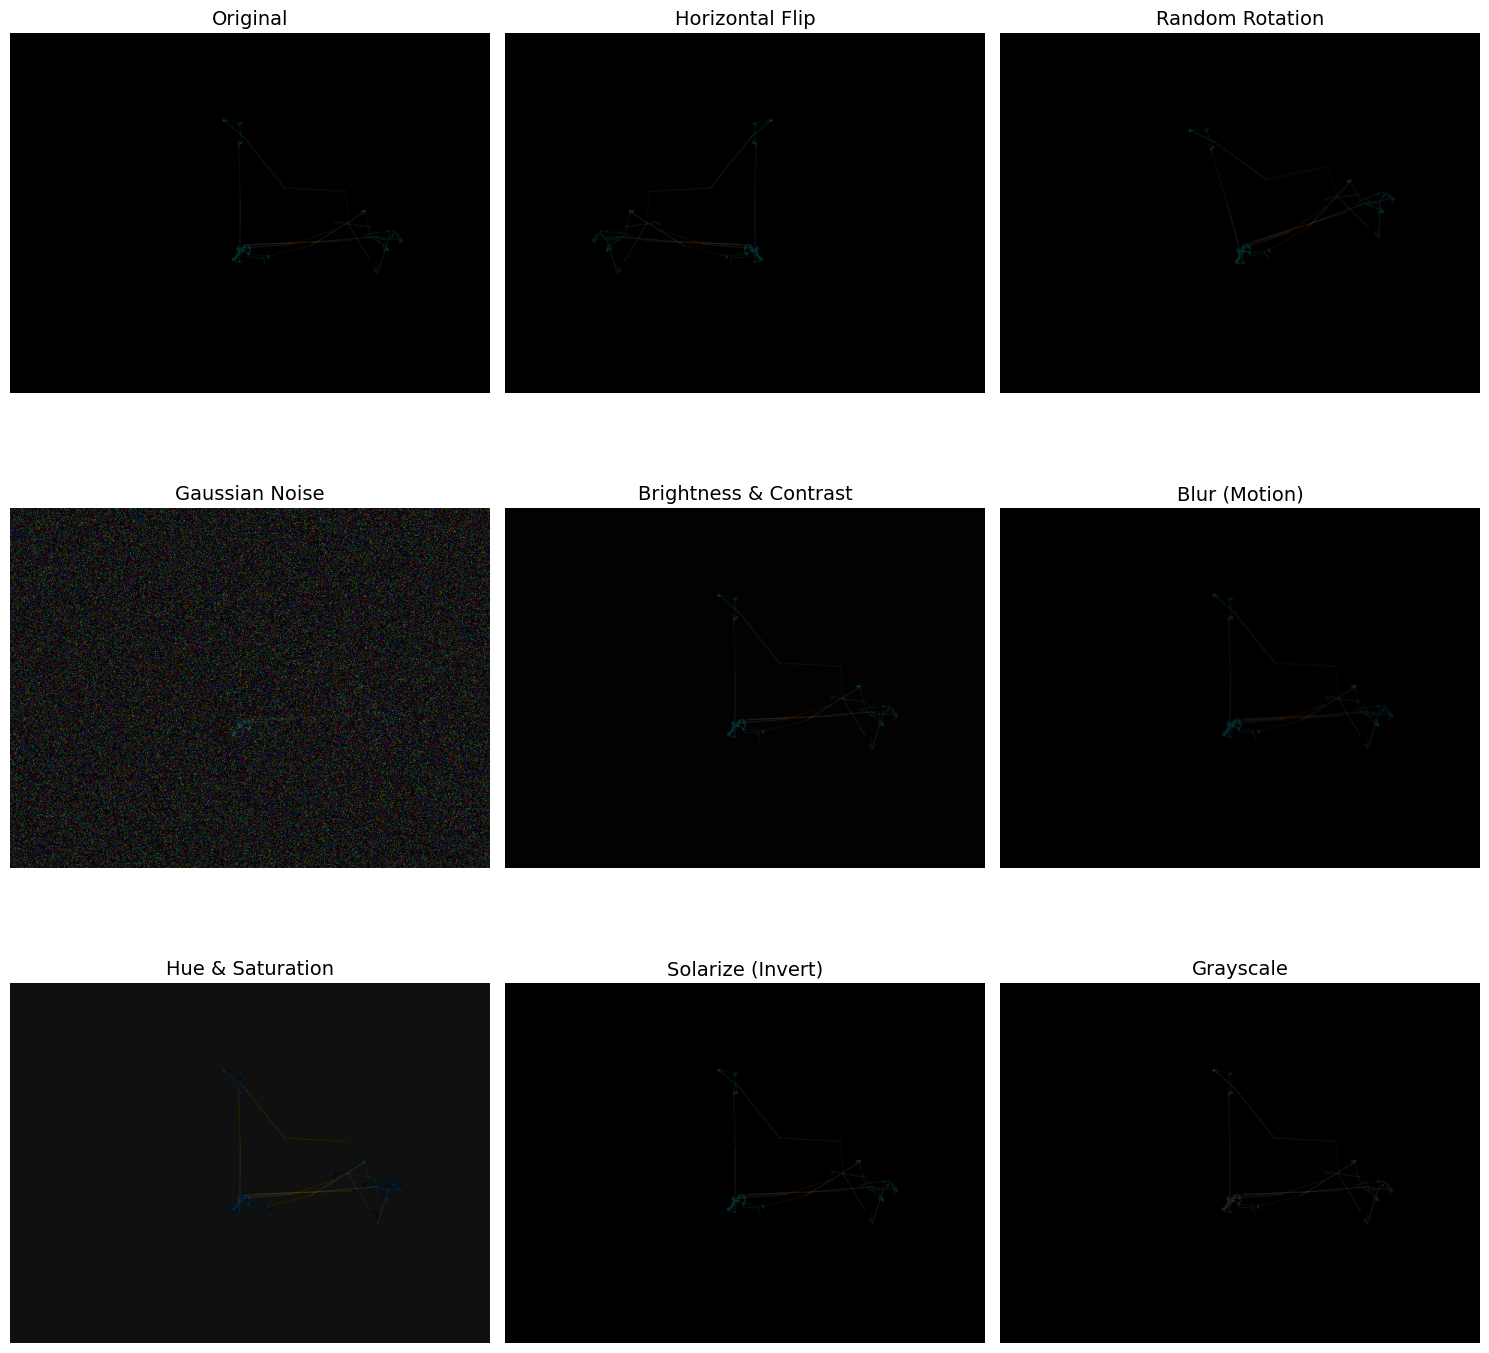

In [3]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt

def apply_and_plot(image_path):
    # 1. Load and prepare image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 2. Define individual transformations
    aug_dict = {
        "Original": None,
        "Horizontal Flip": A.HorizontalFlip(p=1),
        "Random Rotation": A.Rotate(limit=45, p=1),
        "Gaussian Noise": A.GaussNoise(var_limit=(100, 150), p=1),
        "Brightness & Contrast": A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=1),
        "Blur (Motion)": A.MotionBlur(blur_limit=7, p=1),
        "Hue & Saturation": A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=1),
        "Solarize (Invert)": A.Solarize(threshold=128, p=1),
        "Grayscale": A.ToGray(p=1)
    }

    # 3. Setup Plotting
    cols = 3
    rows = (len(aug_dict) + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.flatten()

    # 4. Apply and Show
    for i, (name, aug) in enumerate(aug_dict.items()):
        if aug is None:
            transformed_img = image
        else:
            # Apply the specific augmentation
            transformed_img = aug(image=image)['image']

        axes[i].imshow(transformed_img)
        axes[i].set_title(name, fontsize=14)
        axes[i].axis('off')

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Run the function
apply_and_plot("/content/TS169_24.png")